In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
import seaborn as sns
from statsmodels.formula.api import ols 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from itertools import combinations

In [2]:
df = pd.read_csv('df_master91.csv')

In [3]:
df.head()

,Unnamed: 0,zipcode,median_income,population,county,median_rent,restaurant_count,recycling_bin_count,num_subway_entrances,subway_bracket
0,0,10001,71244.6100,17678,New York County,3400.0,488.0,1.0,51.0,"(6, 72]"
1,1,10002,30843.9574,70878,New York County,3050.0,509.0,10.0,19.0,"(6, 72]"
2,2,10003,89998.5339,53609,New York County,3750.0,682.0,7.0,28.0,"(6, 72]"
3,3,10004,110183.6857,1271,New York County,3876.0,145.0,3.0,6.0,"(0, 6]"
4,4,10005,115133.2855,1517,New York County,3910.0,72.0,3.0,0.0,0


In [4]:
df.columns

Index(['Unnamed: 0', 'zipcode', 'median_income', 'population', 'county',
       'median_rent', 'restaurant_count', 'recycling_bin_count',
       'num_subway_entrances', 'subway_bracket'],
      dtype='object')

In [5]:
#df[['median_income', 'population', 'county', 'median_rent',
#       'restaurant_count', 'recycling_bin_count', 'num_subway_entrances',
#       'subway_bracket']].hist(figsize  = [18, 18])

In [7]:
# fig, axs = plt.subplots(1, 2, sharey=False, figsize=(18, 6))
# for idx, dollars in enumerate(['median_rent_07_to_11', 'median_rent_12_to_16']):
#     df_combined.plot(kind='scatter', x=dollars, y='median_income_07_to_11', ax=axs[idx], label=dollars)
# plt.legend()
# plt.show()

In [8]:
df[df.county == 'Richmond County']

,Unnamed: 0,zipcode,median_income,population,county,median_rent,restaurant_count,recycling_bin_count,num_subway_entrances,subway_bracket
41,41,10305,58937.6580,37014,Richmond County,2200.0,93.0,2.0,4.0,"(0, 6]"
42,42,10306,75212.0632,54812,Richmond County,2300.0,113.0,7.0,10.0,"(6, 72]"
43,43,10312,84524.3656,55963,Richmond County,2350.0,78.0,2.0,6.0,"(0, 6]"
44,44,10314,78413.7436,85260,Richmond County,2300.0,189.0,4.0,0.0,0


In [9]:
df_pairplot = df[['median_income','population', 'median_rent', 'restaurant_count', 'recycling_bin_count', 'num_subway_entrances']]





In [10]:
df_pairplot

,median_income,population,median_rent,restaurant_count,recycling_bin_count,num_subway_entrances
0,71244.6100,17678,3400.0,488.0,1.0,51.0
1,30843.9574,70878,3050.0,509.0,10.0,19.0
2,89998.5339,53609,3750.0,682.0,7.0,28.0
3,110183.6857,1271,3876.0,145.0,3.0,6.0
4,115133.2855,1517,3910.0,72.0,3.0,0.0
5,111220.0000,972,3700.0,45.0,2.0,30.0
6,145458.7823,3520,6325.0,141.0,9.0,26.0
7,56615.2777,56975,3350.0,311.0,13.0,4.0
8,93702.0061,27322,3500.0,259.0,0.0,0.0
9,92359.4888,45899,3695.0,455.0,1.0,72.0


/Users/gracejeong/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


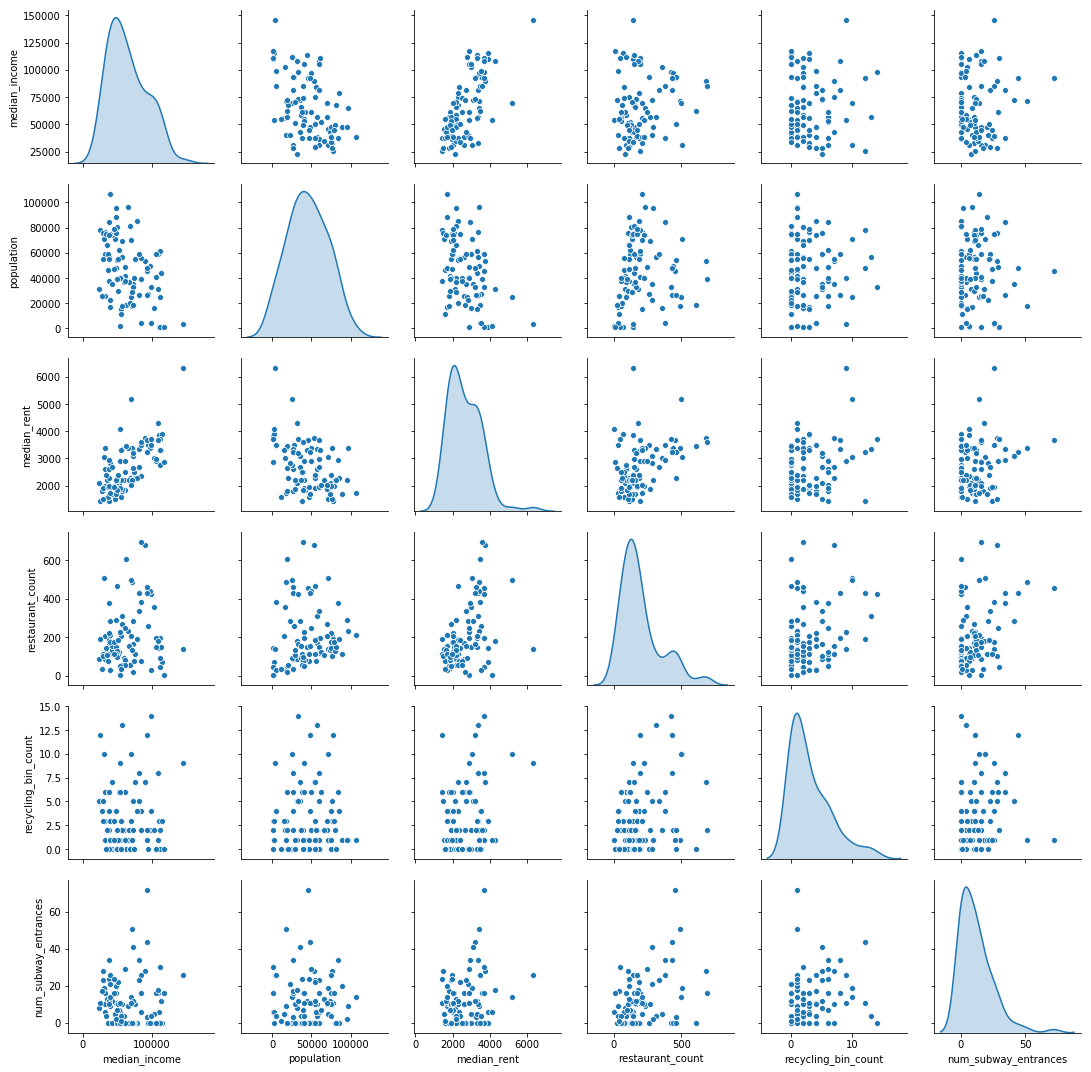

In [11]:
sns.pairplot(df, vars = ['median_income','population', 'median_rent', 'restaurant_count', 'recycling_bin_count', 'num_subway_entrances'],
             diag_kind = 'kde')

In [12]:
plt.savefig('pairplot_all')

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

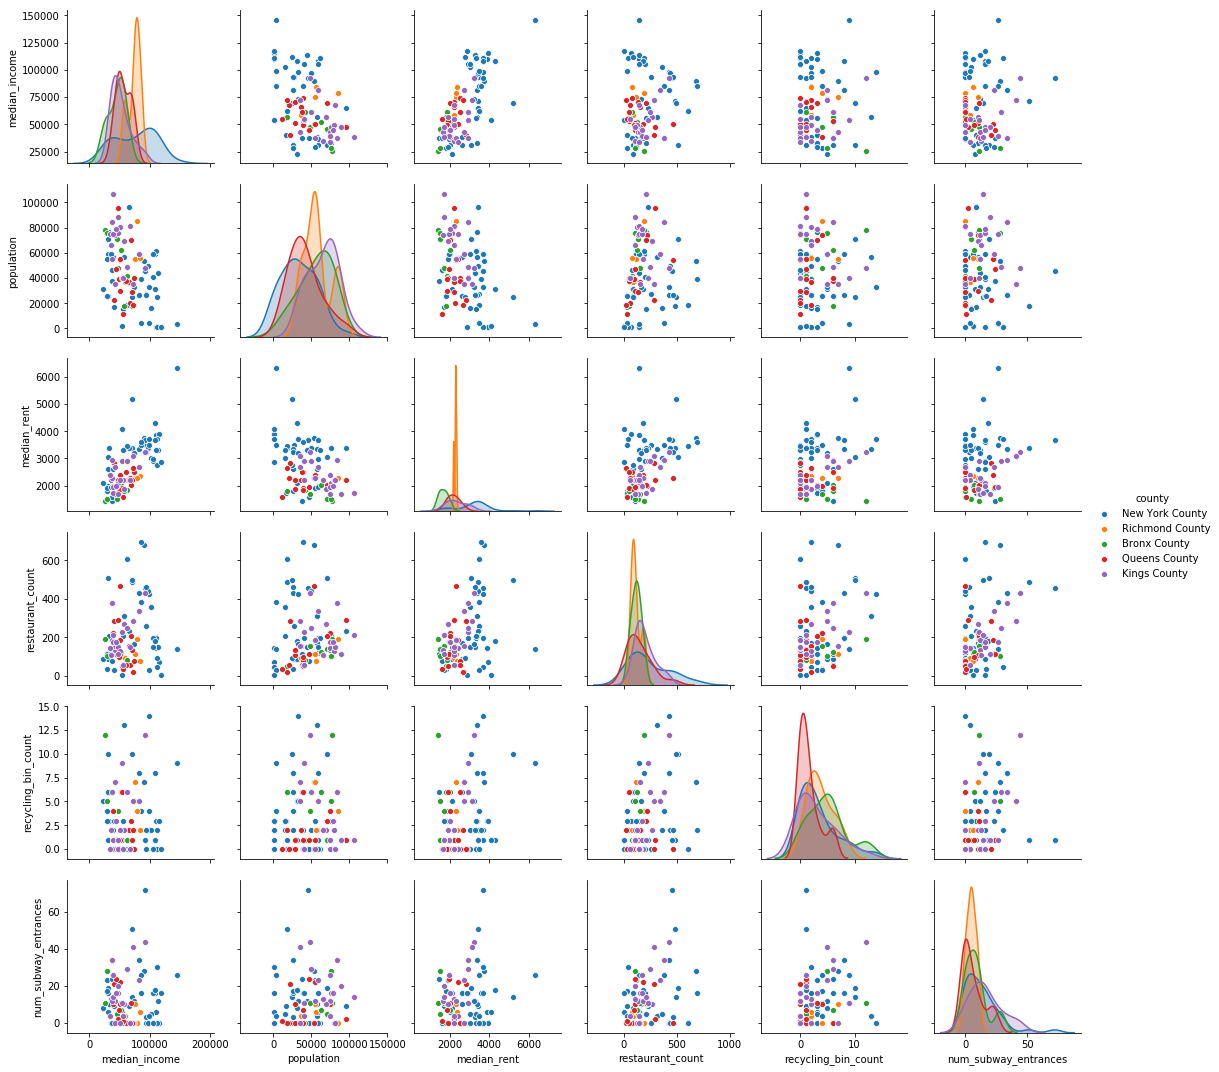

In [13]:
plt.figure()
sns.pairplot(df, vars = ['median_income','population', 'median_rent', 'restaurant_count', 'recycling_bin_count', 'num_subway_entrances'], hue = 'county')
plt.savefig('pairplot_bycounty.png')


In [14]:
df_pairplot_ny = df[df.county == 'New York County'][['median_income','population', 'median_rent', 'restaurant_count', 'recycling_bin_count', 'num_subway_entrances']]
df_pairplot_kings = df[df.county == 'Kings County'][['median_income','population', 'median_rent', 'restaurant_count', 'recycling_bin_count', 'num_subway_entrances']]
df_pairplot_queens = df[df.county == 'Queens County'][['median_income','population', 'median_rent', 'restaurant_count', 'recycling_bin_count', 'num_subway_entrances']]
df_pairplot_richmond = df[df.county == 'Richmond County'][['median_income','population', 'median_rent', 'restaurant_count', 'recycling_bin_count', 'num_subway_entrances']]
df_pairplot_bronx = df[df.county == 'Bronx County'][['median_income','population', 'median_rent', 'restaurant_count', 'recycling_bin_count', 'num_subway_entrances']]


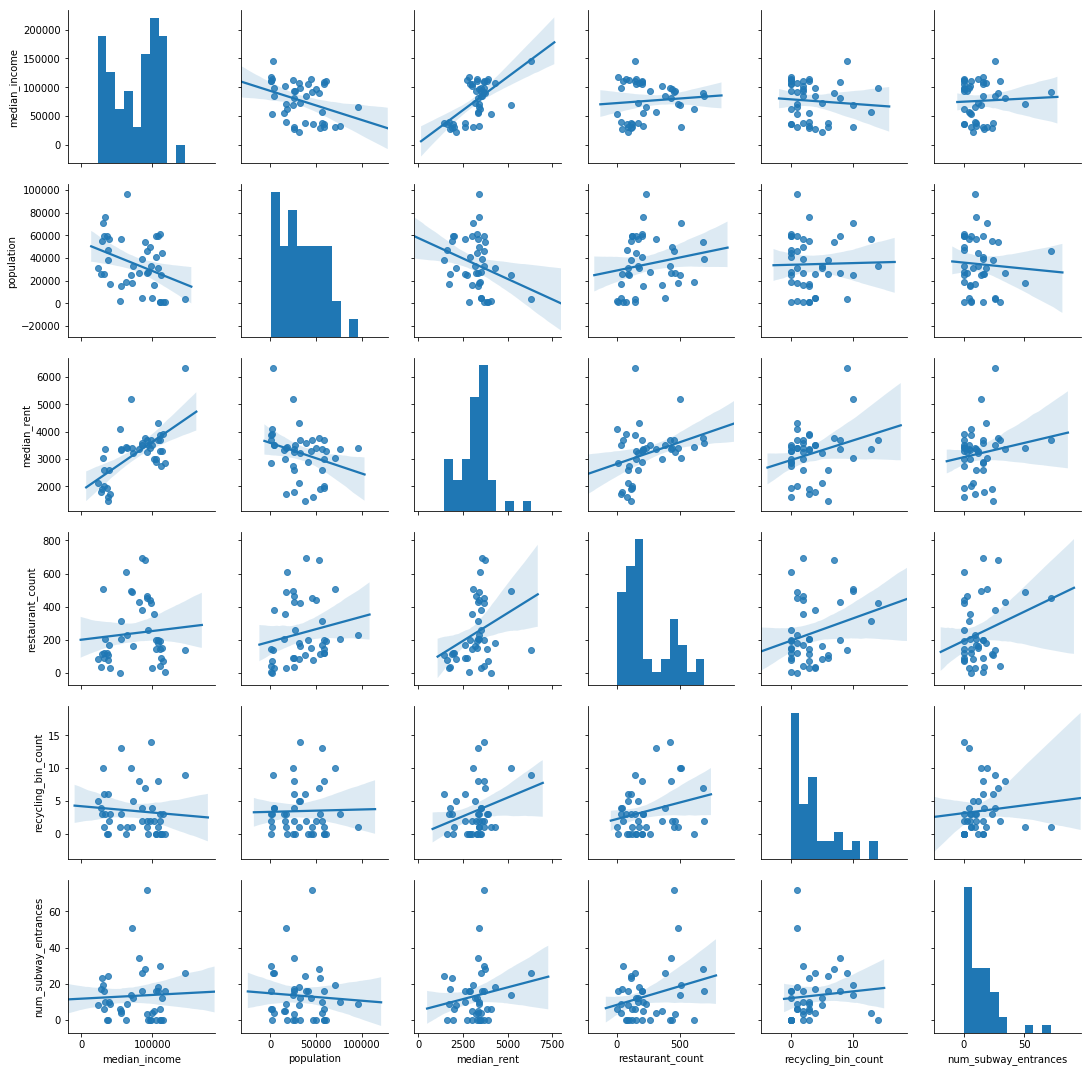

In [15]:
sns.pairplot(df_pairplot_ny, kind='reg')

In [16]:
# sns.pairplot(df_pairplot_kings, kind='reg')

In [17]:
# sns.heatmap(df_pairplot.corr(),vmin=-1, vmax=1, annot = True)
# plt.title('All Boroughs')
# plt.savefig('corr_heatmap_all')

In [18]:
# df_pairplot.corr()

In [19]:
# sns.heatmap(df_pairplot_ny.corr(),vmin=-1, vmax=1, annot = True)
# plt.title('Manhattan')
# plt.savefig('corr_heatmap_ny')

In [20]:
# sns.heatmap(df_pairplot_kings.corr(),vmin=-1, vmax=1, annot = True)
# plt.title('Brooklyn')
# plt.savefig('corr_heatmap_brooklyn')

In [21]:
# sns.heatmap(df_pairplot_queens.corr(),vmin=-1, vmax=1, annot = True)
# plt.title('Queens')
# plt.savefig('corr_heatmap_queens')

In [22]:
# sns.heatmap(df_pairplot_richmond.corr(),vmin=-1, vmax=1, annot = True)
# plt.title('Staten Island')
# plt.savefig('corr_heatmap_staten')

In [23]:
# sns.heatmap(df_pairplot_bronx.corr(),vmin=-1, vmax=1, annot = True)
# plt.title('Bronx')
# plt.savefig('corr_heatmap_bronx')

## ANOVA

In [24]:
formula = 'median_income ~ median_rent + C(county) + recycling_bin_count + C(subway_bracket) +restaurant_count'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                           sum_sq    df          F        PR(>F)
C(county)            1.936111e+09   4.0   1.361118  2.547475e-01
C(subway_bracket)    1.986685e+09   2.0   2.793343  6.712323e-02
median_rent          2.220887e+10   1.0  62.452796  1.167664e-11
recycling_bin_count  1.622631e+09   1.0   4.562944  3.568985e-02
restaurant_count     3.746474e+08   1.0   1.053533  3.077504e-01
Residual             2.880445e+10  81.0        NaN           NaN


## Feature Scaling and Normalization

In [25]:
df.isna().sum()

Unnamed: 0              0
zipcode                 0
median_income           0
population              0
county                  0
median_rent             0
restaurant_count        0
recycling_bin_count     0
num_subway_entrances    0
subway_bracket          0
dtype: int64

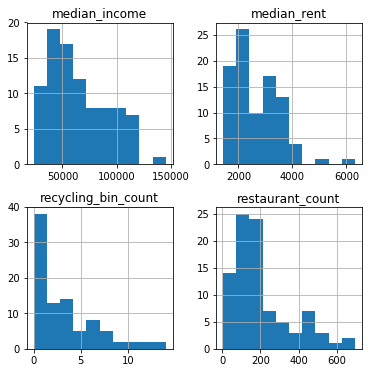

In [26]:
df[["median_income", "recycling_bin_count", "median_rent", "restaurant_count"]].hist(figsize  = [6, 6]);

In [27]:
data_log.columns = [['logincome', 'logrecyc','logrent','logrestaurant']]

NameError: name 'data_log' is not defined

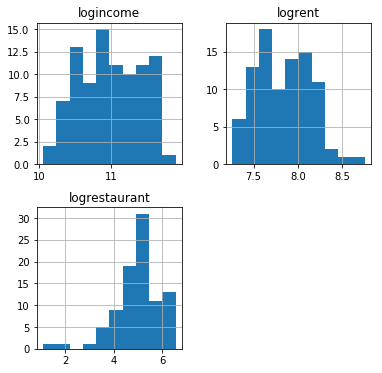

In [28]:
df["logincome"] = np.log(df["median_income"])
df["logrent"] = np.log(df["median_rent"])
df["logrestaurant"] = np.log(df["restaurant_count"])
df[["logincome", "logrent", "logrestaurant"]].hist(figsize  = [6, 6]);

In [29]:
model = smf.ols(formula='logincome ~ logrent',
                 data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              logincome   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     69.65
Date:                Fri, 08 Mar 2019   Prob (F-statistic):           8.46e-13
Time:                        10:21:28   Log-Likelihood:                -24.919
No. Observations:                  91   AIC:                             53.84
Df Residuals:                      89   BIC:                             58.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7931      0.863      4.394      0.000       2.078       5.508
logrent        0.9180      0.110      8.346      0.000       0.699       1.137
==============================================================================
Omnibus:                        6.569   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.724
Skew:                          -0.662   Prob(JB):                       0.0347
Kurtosis:                       2.866   Cond. No.                         204.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
model2 = smf.ols(formula='logincome ~ logrent + recycling_bin_count',
                 data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              logincome   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     38.74
Date:                Fri, 08 Mar 2019   Prob (F-statistic):           8.55e-13
Time:                        10:21:28   Log-Likelihood:                -22.485
No. Observations:                  91   AIC:                             50.97
Df Residuals:                      88   BIC:                             58.50
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               3.4261      0.862      3.977      0.000       1.714       5.138
logrent                 0.9739      0.111      8.801      0.000       0.754       1.194
recycling_bin_count    -0.0223      0.010     -2.199      0.031      -0.042      -0.002
==============================================================================
Omnibus:                        6.945   Durbin-Watson:                   1.651
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                7.255
Skew:                          -0.681   Prob(JB):                       0.0266
Kurtosis:                       2.753   Cond. No.                         227.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
model3 = smf.ols(formula='logincome ~ logrent + recycling_bin_count + C(subway_bracket)',
                 data=df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              logincome   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     22.43
Date:                Fri, 08 Mar 2019   Prob (F-statistic):           1.04e-12
Time:                        10:21:29   Log-Likelihood:                -18.708
No. Observations:                  91   AIC:                             47.42
Df Residuals:                      86   BIC:                             59.97
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        3.4604      0.845      4.094      0.000       1.780       5.141
C(subway_bracket)[T.(6, 72]]    -0.0554      0.091     -0.609      0.544      -0.236       0.125
C(subway_bracket)[T.0]           0.1537      0.101      1.527      0.131      -0.046       0.354
logrent                          0.9663      0.108      8.976      0.000       0.752       1.180
recycling_bin_count             -0.0173      0.010     -1.713      0.090      -0.037       0.003
==============================================================================
Omnibus:                        5.290   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                5.381
Skew:                          -0.578   Prob(JB):                       0.0678
Kurtosis:                       2.715   Cond. No.                         230.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
model4 = smf.ols(formula='logincome ~ logrent + recycling_bin_count + C(subway_bracket) + restaurant_count',
                 data=df).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              logincome   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     18.00
Date:                Fri, 08 Mar 2019   Prob (F-statistic):           3.89e-12
Time:                        10:21:29   Log-Likelihood:                -18.363
No. Observations:                  91   AIC:                             48.73
Df Residuals:                      85   BIC:                             63.79
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        3.1630      0.924      3.422      0.001       1.325       5.001
C(subway_bracket)[T.(6, 72]]    -0.0446      0.092     -0.484      0.630      -0.228       0.139
C(subway_bracket)[T.0]           0.1574      0.101      1.558      0.123      -0.043       0.358
logrent                          1.0079      0.120      8.427      0.000       0.770       1.246
recycling_bin_count             -0.0160      0.010     -1.566      0.121      -0.036       0.004
restaurant_count                -0.0002      0.000     -0.805      0.423      -0.001       0.000
==============================================================================
Omnibus:                        5.883   Durbin-Watson:                   1.766
Prob(Omnibus):                  0.053   Jarque-Bera (JB):                6.020
Skew:                          -0.620   Prob(JB):                       0.0493
Kurtosis:                       2.776   Cond. No.                     7.32e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
model5 = smf.ols(formula='logincome ~ logrent + recycling_bin_count + C(subway_bracket) + restaurant_count*population',
                 data=df).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              logincome   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     13.21
Date:                Fri, 08 Mar 2019   Prob (F-statistic):           2.52e-11
Time:                        10:21:29   Log-Likelihood:                -17.151
No. Observations:                  91   AIC:                             50.30
Df Residuals:                      83   BIC:                             70.39
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        4.0441      1.132      3.571      0.001       1.792       6.296
C(subway_bracket)[T.(6, 72]]    -0.0279      0.093     -0.301      0.764      -0.212       0.157
C(subway_bracket)[T.0]           0.1601      0.101      1.585      0.117      -0.041       0.361
logrent                          0.9034      0.141      6.403      0.000       0.623       1.184
recycling_bin_count             -0.0161      0.010     -1.561      0.122      -0.037       0.004
restaurant_count             -3.301e-05      0.000     -0.073      0.942      -0.001       0.001
population                   -2.064e-06   2.64e-06     -0.781      0.437   -7.32e-06    3.19e-06
restaurant_count:population  -1.097e-09   1.09e-08     -0.100      0.920   -2.28e-08    2.06e-08
==============================================================================
Omnibus:                        5.521   Durbin-Watson:                   1.683
Prob(Omnibus):                  0.063   Jarque-Bera (JB):                5.630
Skew:                          -0.596   Prob(JB):                       0.0599
Kurtosis:                       2.747   Cond. No.                     4.47e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.47e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
model6 = smf.ols(formula='logincome ~ logrent + recycling_bin_count + C(subway_bracket) + restaurant_count*population + C(county)',
                 data=df).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              logincome   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     9.832
Date:                Fri, 08 Mar 2019   Prob (F-statistic):           5.83e-11
Time:                        10:21:29   Log-Likelihood:                -11.979
No. Observations:                  91   AIC:                             47.96
Df Residuals:                      79   BIC:                             78.09
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        3.2469      1.235      2.629      0.010       0.789       5.705
C(subway_bracket)[T.(6, 72]]     0.0305      0.093      0.330      0.742      -0.154       0.215
C(subway_bracket)[T.0]           0.1910      0.101      1.898      0.061      -0.009       0.391
C(county)[T.Kings County]       -0.1928      0.144     -1.336      0.185      -0.480       0.094
C(county)[T.New York County]    -0.2819      0.151     -1.868      0.065      -0.582       0.018
C(county)[T.Queens County]      -0.1876      0.147     -1.276      0.206      -0.480       0.105
C(county)[T.Richmond County]     0.1967      0.196      1.004      0.318      -0.193       0.587
logrent                          1.0349      0.161      6.444      0.000       0.715       1.355
recycling_bin_count             -0.0243      0.011     -2.280      0.025      -0.045      -0.003
restaurant_count             -8.791e-05      0.000     -0.198      0.844      -0.001       0.001
population                   -3.781e-06    2.8e-06     -1.353      0.180   -9.35e-06    1.78e-06
restaurant_count:population   3.271e-09   1.09e-08      0.300      0.765   -1.85e-08     2.5e-08
==============================================================================
Omnibus:                        4.071   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.131   Jarque-Bera (JB):                4.003
Skew:                          -0.507   Prob(JB):                        0.135
Kurtosis:                       2.834   Cond. No.                     5.05e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.05e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
model7 = smf.ols(formula='logincome ~ logrent + recycling_bin_count*population + C(subway_bracket) + restaurant_count*population + C(county)',
                 data=df).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              logincome   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     8.991
Date:                Fri, 08 Mar 2019   Prob (F-statistic):           1.53e-10
Time:                        10:21:30   Log-Likelihood:                -11.704
No. Observations:                  91   AIC:                             49.41
Df Residuals:                      78   BIC:                             82.05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          3.4152      1.263      2.704      0.008       0.901       5.930
C(subway_bracket)[T.(6, 72]]       0.0322      0.093      0.347      0.729      -0.153       0.217
C(subway_bracket)[T.0]             0.1887      0.101      1.867      0.066      -0.013       0.390
C(county)[T.Kings County]         -0.2142      0.148     -1.446      0.152      -0.509       0.081
C(county)[T.New York County]      -0.2961      0.153     -1.937      0.056      -0.600       0.008
C(county)[T.Queens County]        -0.1997      0.149     -1.344      0.183      -0.495       0.096
C(county)[T.Richmond County]       0.1978      0.197      1.007      0.317      -0.193       0.589
logrent                            1.0116      0.165      6.144      0.000       0.684       1.339
recycling_bin_count               -0.0090      0.025     -0.366      0.715      -0.058       0.040
population                     -3.466e-06   2.84e-06     -1.220      0.226   -9.12e-06    2.19e-06
recycling_bin_count:population -3.406e-07   4.96e-07     -0.687      0.494   -1.33e-06    6.47e-07
restaurant_count                  -0.0001      0.000     -0.318      0.752      -0.001       0.001
restaurant_count:population     5.837e-09   1.16e-08      0.504      0.615   -1.72e-08    2.89e-08
==============================================================================
Omnibus:                        3.222   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.200   Jarque-Bera (JB):                3.126
Skew:                          -0.447   Prob(JB):                        0.209
Kurtosis:                       2.839   Cond. No.                     5.15e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
model8 = smf.ols(formula='logincome ~ logrent + recycling_bin_count',
                 data=df).fit()
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              logincome   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     38.74
Date:                Fri, 08 Mar 2019   Prob (F-statistic):           8.55e-13
Time:                        10:21:30   Log-Likelihood:                -22.485
No. Observations:                  91   AIC:                             50.97
Df Residuals:                      88   BIC:                             58.50
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               3.4261      0.862      3.977      0.000       1.714       5.138
logrent                 0.9739      0.111      8.801      0.000       0.754       1.194
recycling_bin_count    -0.0223      0.010     -2.199      0.031      -0.042      -0.002
==============================================================================
Omnibus:                        6.945   Durbin-Watson:                   1.651
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                7.255
Skew:                          -0.681   Prob(JB):                       0.0266
Kurtosis:                       2.753   Cond. No.                         227.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
model9 = smf.ols(formula='logincome ~ C(county)*(logrent + recycling_bin_count)',
                 data=df).fit()
model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              logincome   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     7.488
Date:                Fri, 08 Mar 2019   Prob (F-statistic):           1.49e-09
Time:                        10:21:30   Log-Likelihood:                -11.778
No. Observations:                  91   AIC:                             53.56
Df Residuals:                      76   BIC:                             91.22
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           -2.6036      7.527     -0.346      0.730     -17.595      12.388
C(county)[T.Kings County]                           11.4028      8.574      1.330      0.188      -5.674      28.479
C(county)[T.New York County]                         3.6593      7.630      0.480      0.633     -11.538      18.857
C(county)[T.Queens County]                          11.4490      8.492      1.348      0.182      -5.463      28.361
C(county)[T.Richmond County]                       -29.2331     50.090     -0.584      0.561    -128.996      70.530
logrent                                              1.8161      1.006      1.805      0.075      -0.188       3.820
C(county)[T.Kings County]:logrent                   -1.5676      1.142     -1.373      0.174      -3.842       0.707
C(county)[T.New York County]:logrent                -0.5452      1.018     -0.535      0.594      -2.574       1.483
C(county)[T.Queens County]:logrent                  -1.5462      1.129     -1.370      0.175      -3.794       0.702
C(county)[T.Richmond County]:logrent                 3.7484      6.488      0.578      0.565      -9.174      16.671
recycling_bin_count                                 -0.0397      0.035     -1.148      0.254      -0.109       0.029
C(county)[T.Kings County]:recycling_bin_count        0.0703      0.047      1.490      0.140      -0.024       0.164
C(county)[T.New York County]:recycling_bin_count     0.0023      0.037      0.063      0.950      -0.071       0.076
C(county)[T.Queens County]:recycling_bin_count       0.0429      0.051      0.839      0.404      -0.059       0.145
C(county)[T.Richmond County]:recycling_bin_count     0.0403      0.083      0.486      0.628      -0.125       0.205
==============================================================================
Omnibus:                        4.384   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.112   Jarque-Bera (JB):                3.855
Skew:                          -0.496   Prob(JB):                        0.146
Kurtosis:                       3.180   Cond. No.                     1.61e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
df.head()

,Unnamed: 0,zipcode,median_income,population,county,median_rent,restaurant_count,recycling_bin_count,num_subway_entrances,subway_bracket,logincome,logrent,logrestaurant
0,0,10001,71244.6100,17678,New York County,3400.0,488.0,1.0,51.0,"(6, 72]",11.173874,8.131531,6.190315
1,1,10002,30843.9574,70878,New York County,3050.0,509.0,10.0,19.0,"(6, 72]",10.336696,8.022897,6.232448
2,2,10003,89998.5339,53609,New York County,3750.0,682.0,7.0,28.0,"(6, 72]",11.407549,8.229511,6.525030
3,3,10004,110183.6857,1271,New York County,3876.0,145.0,3.0,6.0,"(0, 6]",11.609904,8.262559,4.976734
4,4,10005,115133.2855,1517,New York County,3910.0,72.0,3.0,0.0,0,11.653846,8.271293,4.276666


## Remove Staten Island

In [39]:
df2 = df[df.county != "Richmond County"]
df2
df2.to_csv('df_ex-SI.csv')

In [40]:
model_exp = smf.ols(formula='logincome ~ restaurant_count*population + recycling_bin_count + logrent',
                 data=df2).fit()
model_exp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              logincome   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     17.83
Date:                Fri, 08 Mar 2019   Prob (F-statistic):           6.99e-12
Time:                        10:21:32   Log-Likelihood:                -17.926
No. Observations:                  87   AIC:                             47.85
Df Residuals:                      81   BIC:                             62.65
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       4.3562      1.143      3.810      0.000       2.081       6.631
restaurant_count            -4.655e-05      0.000     -0.102      0.919      -0.001       0.001
population                  -3.593e-06   2.71e-06     -1.328      0.188   -8.98e-06    1.79e-06
restaurant_count:population  1.241e-09   1.11e-08      0.112      0.911   -2.08e-08    2.33e-08
recycling_bin_count            -0.0225      0.010     -2.179      0.032      -0.043      -0.002
logrent                         0.8738      0.143      6.122      0.000       0.590       1.158
==============================================================================
Omnibus:                        6.979   Durbin-Watson:                   1.684
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                7.186
Skew:                          -0.701   Prob(JB):                       0.0275
Kurtosis:                       2.874   Cond. No.                     4.43e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.43e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
# BACK-UP MODEL ('logincome ~ logrent + recycling_bin_count + population')
modela = smf.ols(formula='logincome ~ logrent + recycling_bin_count + population',
                 data=df2).fit()
modela.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              logincome   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     30.44
Date:                Fri, 08 Mar 2019   Prob (F-statistic):           2.26e-13
Time:                        10:21:33   Log-Likelihood:                -17.933
No. Observations:                  87   AIC:                             43.87
Df Residuals:                      83   BIC:                             53.73
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               4.3367      0.956      4.538      0.000       2.436       6.237
logrent                 0.8752      0.119      7.363      0.000       0.639       1.112
recycling_bin_count    -0.0224      0.010     -2.256      0.027      -0.042      -0.003
population          -3.356e-06   1.43e-06     -2.343      0.022    -6.2e-06   -5.07e-07
==============================================================================
Omnibus:                        6.880   Durbin-Watson:                   1.683
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                7.092
Skew:                          -0.696   Prob(JB):                       0.0288
Kurtosis:                       2.855   Cond. No.                     1.52e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
df2.dtypes

Unnamed: 0                int64
zipcode                   int64
median_income           float64
population                int64
county                   object
median_rent             float64
restaurant_count        float64
recycling_bin_count     float64
num_subway_entrances    float64
subway_bracket           object
logincome               float64
logrent                 float64
logrestaurant           float64
dtype: object

In [43]:
df2['predicted_inc'] = 4.3367 + (0.8752*df2['logrent']) - (0.0224*df2['recycling_bin_count']) - (0.000003356*df2['population'])




/Users/gracejeong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [44]:
df2['difference'] = df2['logincome'] - df2['predicted_inc']

/Users/gracejeong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [45]:
df2

,Unnamed: 0,zipcode,median_income,population,county,median_rent,restaurant_count,recycling_bin_count,num_subway_entrances,subway_bracket,logincome,logrent,logrestaurant,predicted_inc,difference
0,0,10001,71244.6100,17678,New York County,3400.0,488.0,1.0,51.0,"(6, 72]",11.173874,8.131531,6.190315,11.371688,-0.197814
1,1,10002,30843.9574,70878,New York County,3050.0,509.0,10.0,19.0,"(6, 72]",10.336696,8.022897,6.232448,10.896473,-0.559777
2,2,10003,89998.5339,53609,New York County,3750.0,682.0,7.0,28.0,"(6, 72]",11.407549,8.229511,6.525030,11.202456,0.205092
3,3,10004,110183.6857,1271,New York County,3876.0,145.0,3.0,6.0,"(0, 6]",11.609904,8.262559,4.976734,11.496626,0.113278
4,4,10005,115133.2855,1517,New York County,3910.0,72.0,3.0,0.0,0,11.653846,8.271293,4.276666,11.503444,0.150401
5,5,10006,111220.0000,972,New York County,3700.0,45.0,2.0,30.0,"(6, 72]",11.619266,8.216088,3.806662,11.479358,0.139907
6,6,10007,145458.7823,3520,New York County,6325.0,141.0,9.0,26.0,"(6, 72]",11.887648,8.752265,4.948760,11.783269,0.104379
7,7,10009,56615.2777,56975,New York County,3350.0,311.0,13.0,4.0,"(0, 6]",10.944034,8.116716,5.739793,10.958041,-0.014007
8,8,10010,93702.0061,27322,New York County,3500.0,259.0,0.0,0.0,0,11.447875,8.160518,5.556828,11.387093,0.060782
9,9,10011,92359.4888,45899,New York County,3695.0,455.0,1.0,72.0,"(6, 72]",11.433444,8.214736,6.120297,11.349800,0.083644


In [46]:
df2.to_csv('df_ex-SI.csv')

In [ ]:
# PREDICTION DIFFERENCE OF BACK-UP MODEL
plt.figure(figsize = [12,8])
sns.distplot(df2['difference'])
plt.savefig('model_diff_hist.png')

In [ ]:
# PARTIAL RESIDUAL PLOT FOR BACK-UP MODEL
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(modela, fig=fig)


In [ ]:
# ANOVA FOR BACKUP MODEL
formula = 'logincome ~ logrent + recycling_bin_count + population'
lm = ols(formula, df2).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

In [ ]:
modela.summary()

In [ ]:
modelb = smf.ols(formula='logincome ~ logrent + recycling_bin_count + population +C(county)',
                 data=df2).fit()
modelb.summary()

In [ ]:
df2_pairplot = df2[['median_income','population', 'median_rent', 'restaurant_count', 'recycling_bin_count', 'num_subway_entrances']]

In [ ]:
sns.heatmap(df2_pairplot.corr(),vmin=-1, vmax=1, annot = True)
plt.savefig('heatmap_exSI.png')

In [ ]:
residual = modela.resid
fig = sm.graphics.qqplot(residual, dist=stats.norm, line='45', fit=True)
fig.show()

In [ ]:
df2

In [ ]:
# heteroskedasticity plot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
sns.regplot(x ='logrent', y ='logincome', scatter=True, data = df2, ax = axes[0,0])
sns.regplot(x ='recycling_bin_count', y ='logincome', scatter = True, data = df2, ax = axes[0,1])
sns.regplot(x ='population', y ='logincome', scatter=True, data = df2, ax = axes[1,0])
sns.regplot(x ='logrestaurant', y ='logincome', scatter=True, data = df2, ax = axes[1,1])

In [ ]:
plt.savefig('heteroskedasticity_subplots_backupmodel.png')